# Data Preprocessing/Transformation & Models Exploration

### Done By: 

**Project Group 3**

Aung Naing Tun (A0199810W); 

Branda Phoon Ying Jie (A0202251B);

Lin Ru (A0202800B);

Mavis Neo (A0203855E); 

Neo Jia Tian (A0202689X)

## Setting Up

### Installing & Importing Necessary Packages

In [1]:
"""Necessary Libs/Packages to Install"""
!pip install imblearn
!pip install plot-metric
!pip install xgboost
!pip install shap

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
"""Importing Necessary Libs/Packages"""
# General and data analysis/manipulating libs
import numpy as np
from numpy import mean
import pandas as pd

# Libs for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from plot_metric.functions import BinaryClassification
import shap

shap.initjs()

# Libs for model preprocessing & modellings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter


from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier,EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras import backend as K
import keras
import tensorflow
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.utils import class_weight
import xgboost as xgb


from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# For warnings suppressing
import warnings
warnings.filterwarnings("ignore")

# So that to display plots inline within jupyter notebook directly below the code cell
%matplotlib inline 

#matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-11-16 10:19:22.132912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 10:19:22.528027: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-16 10:19:22.534697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 10:19:22.534727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

### Importing & Loading the Dataset(s)

In [3]:
## Import the dataset 
df = pd.read_csv('./fraud_oracle.csv')

In [4]:
## Removal of the one row of record with 0 value identified from DayofWeekClaimed/MonthClaimed
df = df[~(df['DayOfWeekClaimed'] == '0')]

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
df.shape

(15419, 33)

## Data Preprocessing/Transformation - Features Transformation

### Removal of Columns Identified from EDA

In [7]:
selected_columns = [
    "WeekOfMonth", "Age", "RepNumber","Deductible", "DriverRating","Year",
    "Month","Make","AccidentArea", "Sex", "Fault", "PolicyType", "VehiclePrice",
    "Days_Policy_Accident", "PastNumberOfClaims", "AgeOfVehicle", "AgeOfPolicyHolder",
    "AgentType", "NumberOfSuppliments", "AddressChange_Claim","FraudFound_P"
]

df = df[selected_columns]

df.columns


Index(['WeekOfMonth', 'Age', 'RepNumber', 'Deductible', 'DriverRating', 'Year',
       'Month', 'Make', 'AccidentArea', 'Sex', 'Fault', 'PolicyType',
       'VehiclePrice', 'Days_Policy_Accident', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'FraudFound_P'],
      dtype='object')

### Converting/Transforming Necessary Variables to Categorical

In [8]:
# Two numerical variables that we deem categorical are Deductible and DriverRating
df['Deductible'] = df['Deductible'].astype('category')
df['DriverRating'] = df['DriverRating'].astype('category')

# Object variables to be categorical (not sure if this is needed)
obj_variables = list(df.select_dtypes(include=['object']).columns)
for i in obj_variables:
    df[i] = df[i].astype('category')

# Converting the target variable to binary cat 0,1 
df['FraudFound_P'] = df['FraudFound_P'].astype('category')

### One Hot Encoding of Categorical Variables

In [9]:
## EDITED (to perform on nominal var): Perform One-Hot Encoding to represent categorical variables as binary vectors
onehot_encoder = OneHotEncoder()

counts = 0
expected_counts = 0

cat_columns = ["Month", "Make", "AccidentArea", "Sex", "Fault", "PolicyType", "AgentType",
                "Deductible", "DriverRating", "VehiclePrice", "Days_Policy_Accident", "PastNumberOfClaims", 
                "AgeOfVehicle", "AgeOfPolicyHolder", "NumberOfSuppliments", "AddressChange_Claim"]

for i in range(len(cat_columns)):

    expected_counts += len(set(df[cat_columns[i]]))

    X = pd.get_dummies(df[cat_columns[i]], prefix=cat_columns[i])

    cat_columns.extend(X.columns.tolist())

    counts += len(X.columns)

    df = pd.concat([df, X], axis=1)
   
    df= df.drop([cat_columns[i]], axis=1) 

df

print("Successful Transformation " + str(counts == expected_counts))


Successful Transformation True


In [10]:
df.head(5)

,WeekOfMonth,Age,RepNumber,Year,FraudFound_P,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,...,AgeOfPolicyHolder_over 65,NumberOfSuppliments_1 to 2,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,5,21,12,1994,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,3,34,15,1994,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,5,47,7,1994,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2,65,4,1994,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,27,3,1994,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Training-Validation-Test Split & Data Scaling

### Training-Validation-Test Sets Splitting

In [11]:
## Train-Validate-Test Split: 80-10-10

target_var = df['FraudFound_P'] # this is the y variable
X = df.drop(['FraudFound_P'], axis=1) 

# Splitting train + (val + test)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, target_var, train_size=0.8, random_state=1)

# Splitting val + test (10-10 means 50% each from the remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=1) 

### Data Scaling

In [12]:
# to get list of feature names before standard scaling
feature_names = list(X_train.columns)

In [13]:
feature_names

['WeekOfMonth',
 'Age',
 'RepNumber',
 'Year',
 'Month_Apr',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Make_Accura',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'AccidentArea_Rural',
 'AccidentArea_Urban',
 'Sex_Female',
 'Sex_Male',
 'Fault_Policy Holder',
 'Fault_Third Party',
 'PolicyType_Sedan - All Perils',
 'PolicyType_Sedan - Collision',
 'PolicyType_Sedan - Liability',
 'PolicyType_Sport - All Perils',
 'PolicyType_Sport - Collision',
 'PolicyType_Sport - Liability',
 'PolicyType_Utility - All Perils',
 'PolicyType_Utility - Collision',
 'PolicyType_Utility - Liability',
 'AgentType_External',
 'AgentType_Internal',
 'Deductible_300'

In [14]:
## StandardScaler to standardize the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_val = scale.transform(X_val)

## Features Importance Assessing & Selection

In [15]:
## logistic reg model fitting/training with the training sets
featureImpt_model = LogisticRegression(random_state=0, class_weight='balanced')
featureImpt_model.fit(X_train, y_train)

## We use the absolutue values to get importance

abs_importances = pd.DataFrame(data= {
    'Attribute': feature_names,
    'Importance': [abs(i) for i in featureImpt_model.coef_[0]]
})


abs_importances = abs_importances.sort_values(by='Importance', ascending=False)

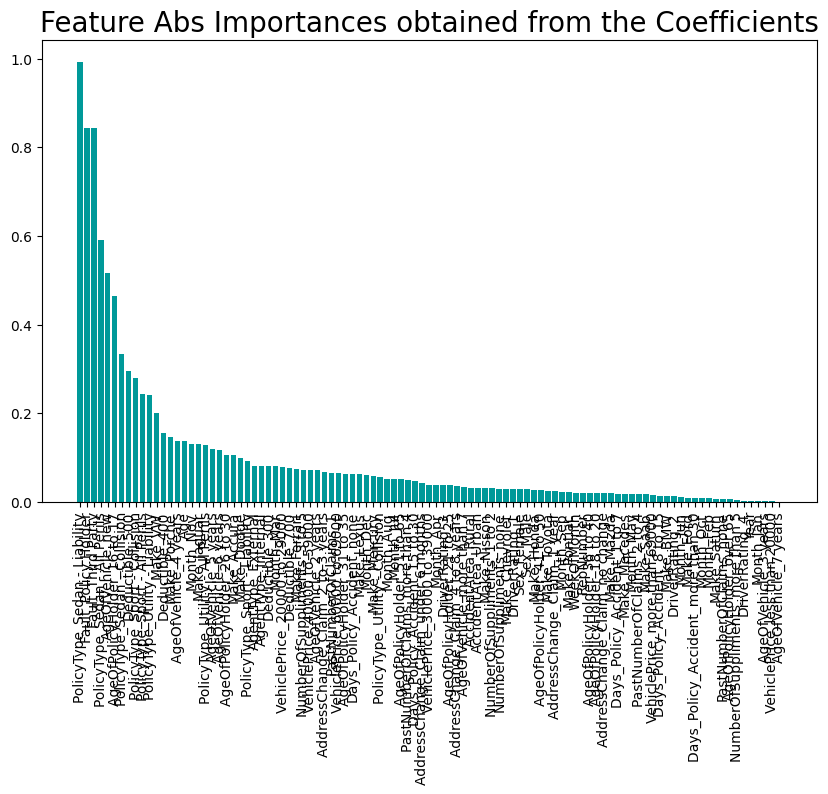

In [16]:
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(x=abs_importances['Attribute'], height=abs_importances['Importance'], color="#009999")
plt.title("Feature Abs Importances obtained from the Coefficients", size=20)
plt.xticks(rotation="vertical")
plt.show()

In [17]:
abs_importances

,Attribute,Importance
43,PolicyType_Sedan - Liability,0.993044
39,Fault_Policy Holder,0.843963
40,Fault_Third Party,0.843963
41,PolicyType_Sedan - All Perils,0.591653
82,AgeOfVehicle_new,0.516559
...,...,...
3,Year,0.001408
8,Month_Jan,0.001198
76,AgeOfVehicle_3 years,0.000748
64,VehiclePrice_less than 20000,0.000679


In [18]:
# only select top 50 important features (around half of total features)

important_columns = abs_importances[0:50]
# index column of these features
impt_index = important_columns.index
impt_feature_names = important_columns.Attribute

impt_index

Int64Index([ 43,  39,  40,  41,  82,  83,  42,  54,  45,  44,  49,  34,  53,
             30,  77,   1,  13,  23,  47,  78,  79,  86,  16,  19,  46,  50,
             51,  52,  11,  60,  55,  20,  93,  62,  75,  97,  71,  63,  87,
             70,  24,   6,  27,  48,   5,   9,  90,  73,  67, 100],
           dtype='int64')

In [19]:
## Subsetting only the 50 impt features based on their indexes
X_train = X_train[:,impt_index]
X_val = X_val[:,impt_index]
X_test = X_test[:,impt_index]

## Models Exploration

### Function(s) Defined

In [61]:
# for final evaluation
all_models = ['Logistic Regression', 'Support Vector Machine (SVM)', 'XGBoost', 'Random Forest', 'Neural Network (NN)']
recall_result, roc_auc, accuracy= {}, {}, {}

In [62]:
## Evaluation function defined 
def evaluate(model, model_name, test_features, test_labels):

    if model_name == "Neural Network" or model_name == "XGBoost":
        predictions = model.predict(test_features)
        y_pred_class = model.predict(test_features).round()
    else:
        predictions = model.predict_proba(test_features)
        predictions = [i[1] for i in predictions]
        y_pred_class = model.predict(test_features)
    threshold = 0.5

    print(model_name)

    print('Model Performance')

    cm = confusion_matrix(test_labels, y_pred_class, normalize='true')

    ax = sns.heatmap(cm, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Class')
    ax.set_ylabel('Actual Class');

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    performanceMetric = classification_report(test_labels, y_pred_class)
    print(performanceMetric)

    # Use plot_metric to plot the ROC Curve
    fpr, tpr, thresh = roc_curve(test_labels, predictions)

    # auc scores
    #auc_score = roc_auc_score(test_labels, predictions)
    auc_score = roc_auc_score(test_labels, y_pred_class)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_labels))]
    p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

    print("AUC Score")

    print(auc_score)

    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr, tpr, color='black', label=model_name)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='red', label='Random Guess')

    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.show()

    # for final evaluation
    class_rep = classification_report(test_labels, y_pred_class, output_dict=True)
    recall_result[model_name] = class_rep.get('1').get('recall')
    accuracy[model_name] = class_rep.get('accuracy')

    roc_auc[model_name] = auc_score

### Model 1 - Logistic Regression

#### Model Fitting/Training & Model Validating

In [22]:
# from sklearn.model_selection import GridSearchCV

# parameters_log = {
#     'penalty' : ['l1','l2'],  # Penalty term 
#     'C'       : np.logspace(-3,3,7), # Inverse of regularization strength, smaller == stronger
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'], # Algorithm used for optimization prob.
#     'random_state': [0],
#     'class_weight': ['balanced'] # Adjust for the weight imbalanced of classes
# }

# logreg = LogisticRegression()

# clf_log = GridSearchCV(logreg,                    # model
#                    param_grid = parameters_log,   # hyperparameters
#                    scoring='recall',        # metric for scoring
#                    cv=10)                     # number of folds


# clf_log.fit(X_train,y_train)

# best_model_logistic = clf_log.best_estimator_

**Best Model:** 

LogisticRegression(C= 0.01, class_weight='balanced', penalty='l1', random_state= 0, solver='liblinear')

Logistic Regression
Model Performance


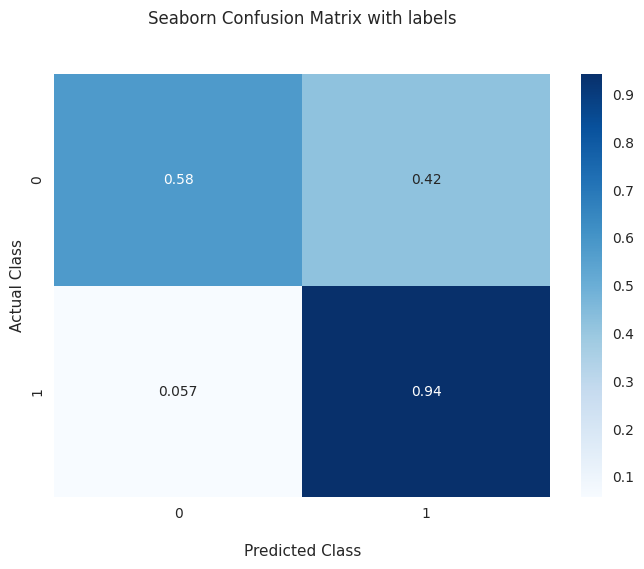

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      1454
           1       0.12      0.94      0.21        88

    accuracy                           0.60      1542
   macro avg       0.56      0.76      0.47      1542
weighted avg       0.94      0.60      0.70      1542

AUC Score
0.7597614730523947


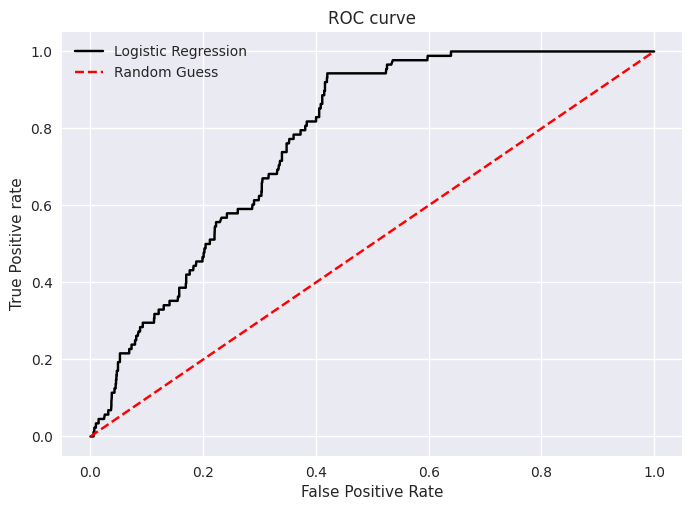

In [63]:
## logistic reg model fitting/training with the training sets
#logisReg_model = LogisticRegression(clf_log.best_params_)
logisReg_model = LogisticRegression(C= 0.01, class_weight='balanced', penalty='l1', random_state= 0, solver='liblinear')
logisReg_model.fit(X_train, y_train)

evaluate(logisReg_model, "Logistic Regression", X_val, y_val)

## Making preditions on the validation set
#logis_predictions = logisReg_model.predict(X_val)

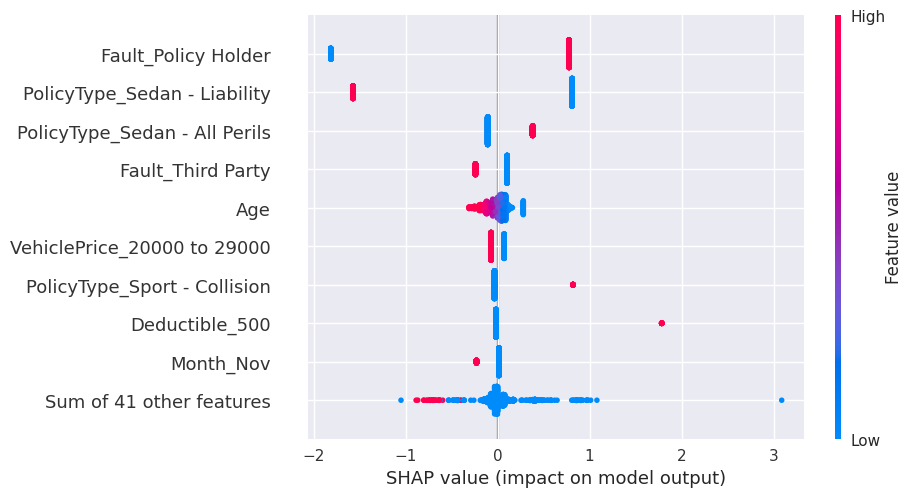

In [24]:
LRexplainer = shap.Explainer(logisReg_model, X_val, feature_names=impt_feature_names.values)
LRshap_values = LRexplainer(X_val)
shap.plots.beeswarm(LRshap_values)


Based on the top few features, we can observe that:
- A lower value of `Fault_Policy Holder` will lead to lower chance of fraud while a higher value of `Fault_Policy Holder` will lead to higher chance of fraud.
- A higher value of `PolicyType_Sedan - Liability` will lead to lower chance of fraud while a lower value of `PolicyType_Sedan - Liability` will lead to higher chance of fraud. 
- A higher value of `PolicyType_Sedan - All Perils` will lead to higher chance of fraud.
- A higher value of `Fault_Third Party` will lead to lower chance of fraud.
- A higher value of `Age` will lead to lower chance of fraud while a lower value of `Age` will lead to higher chance of fraud.
- A higher value of `PolicyType_Sport - Collision` will lead to higher chance of fraud. 
- A higher value of `Deductible_500` will lead to higher chance of fraud. 
- A higher value of `Month_Nov` will lead to lower chance of fraud.

### Model 2 - Support Vector Machine (SVM)

#### Find best hyperparameters
C - how much we want to avoid misclassifying each training example
https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel 

In [25]:
# svm model
# svm_model = SVC()

# param_grid_svm = {'C': [0.1,1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#                     'random_state':[0], 'class_weight': ['balanced']}

# define grid search
# grid_svm = GridSearchCV(svm_model,                   
#                    param_grid = param_grid_svm,   
#                    scoring='recall',      # 'roc_auc'
#                    cv=10,
#                    n_jobs=-1)           # to use all processors      

# grid_svm = GridSearchCV(svm_model,param_grid=param_grid_svm,verbose=2, scoring='recall',cv=5,n_jobs=-1) 

# # perform grid search
# grid_result_svm = grid_svm.fit(X_train, y_train)

# # result
# best_model_svm = grid_result_svm.best_estimator_
# print("Tuned Hyperparameters :", best_model_svm)

**Best Model:**

SVC(kernel='linear', probability=True, C=0.1, random_state=0, class_weight='balanced')

#### SVM model

SVM
Model Performance


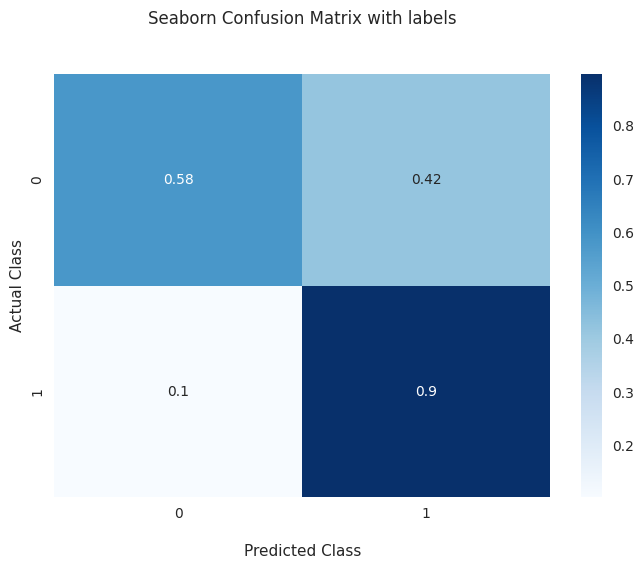

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      1454
           1       0.11      0.90      0.20        88

    accuracy                           0.60      1542
   macro avg       0.55      0.74      0.47      1542
weighted avg       0.94      0.60      0.70      1542

AUC Score
0.7394413530073778


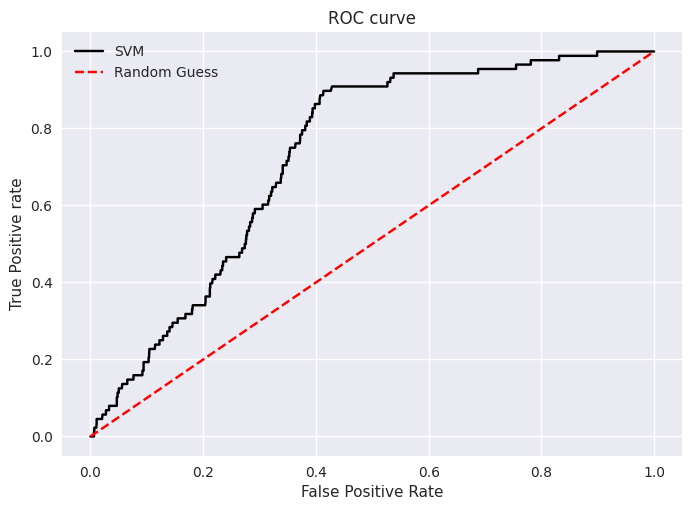

In [64]:
svm_model = SVC(kernel='linear', probability=True, C=0.1, random_state=0, class_weight='balanced')
svm_model.fit(X_train, y_train)

evaluate(svm_model, "SVM", X_val, y_val)

Permutation explainer: 1543it [1:40:48,  3.93s/it]


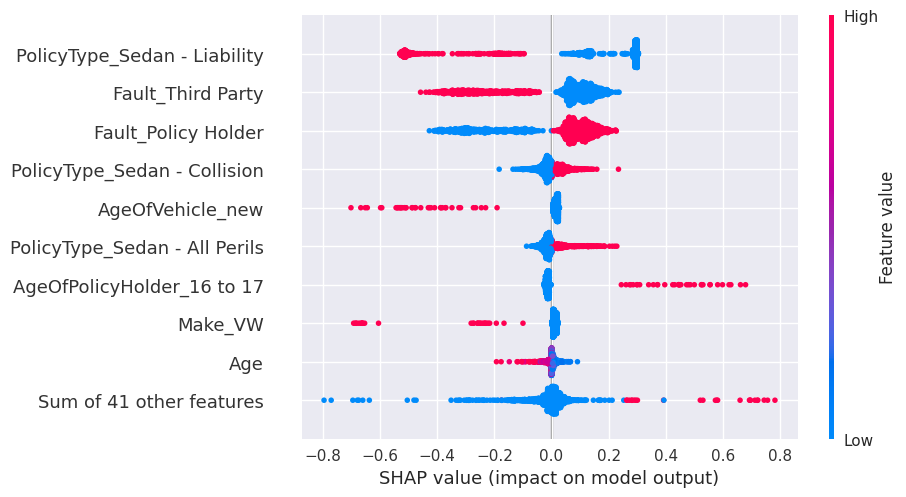

In [165]:
SVMexplainer = shap.Explainer(svm_model.predict, X_val, feature_names=impt_feature_names.values)
SVMshap_values = SVMexplainer(X_val)
shap.plots.beeswarm(SVMshap_values)

Based on the top few features, we can observe that:
- A higher value of `PolicyType_Sedan - Liability` will lead to lower chance of fraud.
- A higher value of `Fault_Third Party` will lead to lower chance of fraud. 
- A lower value of `Fault_Policy Holder` will lead to lower chance of fraud. 
- A higher value of `AgeOfVehicle_new` will lead to lower chance of fraud. 
- A higher value of `AgeOfPolicyHolder_16 to 17` will lead to higher chance of fraud.
- A higher value of `Deductible_500` will lead to higher chance of fraud.

### Model 3 - XGBoost

In [28]:
# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7],
#             'scale_pos_weight': [16]}
           
# xgbr_model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='aucpr', seed=0)
# clf = GridSearchCV(estimator=xgbr_model, 
#                    param_grid=params,
#                    scoring='recall')
# clf.fit(X_train,y_train)
# evaluate(clf, "tuned XGB", X_val, y_val)

Scale_pos_weight hyperparameter has the effect of weighing the balance of positive examples, relative to negative examples when boosting decision trees. For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1).

This has the effect of scaling errors made by the model during training on the positive class and encourages the model to over-correct them. In turn, this can help the model achieve better performance when making predictions on the positive class.

scale_pos_weight = total_negative_examples / total_positive_examples = 11607 / 728 = 16

**Best Model:** 

XGB('colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 16)

XGB
Model Performance


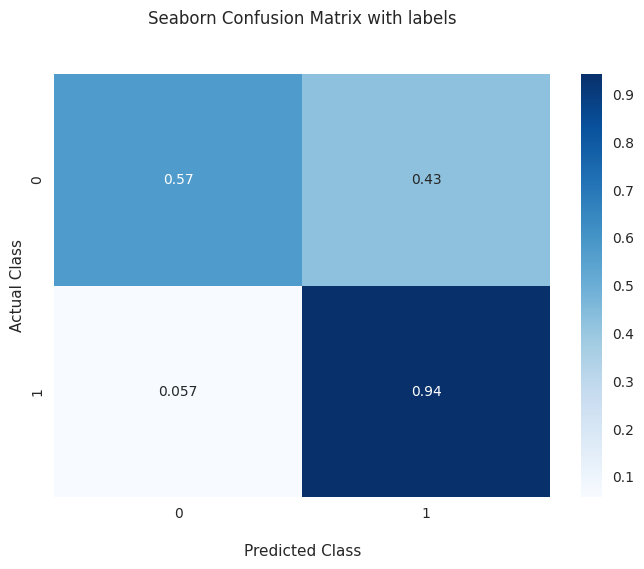

              precision    recall  f1-score   support

           0       0.99      0.57      0.73      1454
           1       0.12      0.94      0.21        88

    accuracy                           0.60      1542
   macro avg       0.56      0.76      0.47      1542
weighted avg       0.94      0.60      0.70      1542

AUC Score
0.7587298361885708


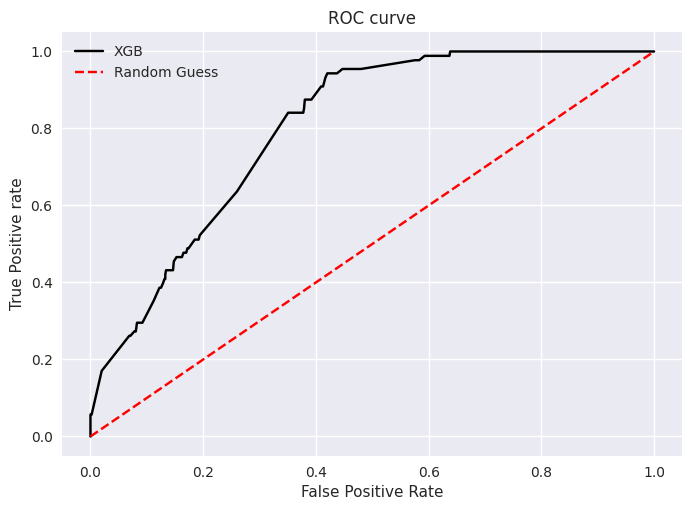

In [65]:
xgbr_model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='aucpr', colsample_bytree= 0.7,
learning_rate= 0.01, max_depth= 3,n_estimators= 100,scale_pos_weight= 16, seed=0)
xgbr_model.fit(X_train,y_train)
evaluate(xgbr_model, "XGB", X_val, y_val)

Permutation explainer: 1543it [02:19, 10.22it/s]


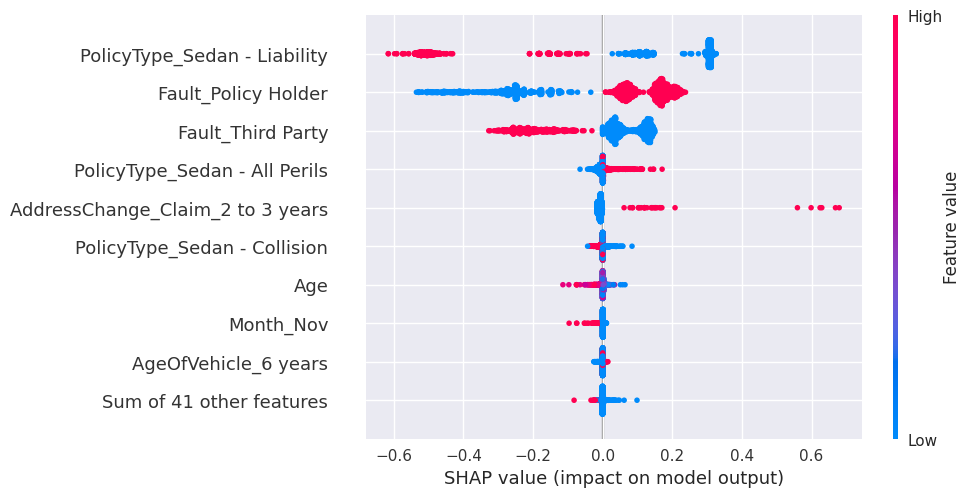

In [30]:
XGBexplainer = shap.Explainer(xgbr_model.predict, X_val, feature_names=impt_feature_names.values)
XGBshap_values = XGBexplainer(X_val)
shap.plots.beeswarm(XGBshap_values)

Based on the top few features, we can observe that:
- A higher value of `PolicyType_Sedan - Liability` will lead to lower chance of fraud while a lower value of `PolicyType_Sedan - Liability` will lead to higher chance of fraud.
- A higher value of `Fault_Policy Holder` will lead to higher chance of fraud while a lower value of `Fault_Policy Holder` will lead to lower chance of fraud.
- A higher value of `Fault_Third Party` will lead to lower chance of fraud while a lower value of `Fault_Third Party` will lead to higher chance of fraud.
- A higher value of `PolicyType_Sedan - All Perils` will lead to higher chance of fraud.
- A higher value of `AddressChange_Claim_2 to 3 years` will lead to higher chance of fraud.
- A higher value of `Age` will lead to lower chance of fraud.
- A higher value of `Month_Nov` will lead to lower chance of fraud.

### Model 4 - Random Forest

In [31]:
# selectedModels = [BalancedBaggingClassifier(DecisionTreeClassifier()), EasyEnsembleClassifier(AdaBoostClassifier()), BalancedRandomForestClassifier()]

# rf_param_grid = {
#     'bootstrap': [True],
#     # The maximum depth of the tree
#     'max_depth': [80, 90, 100, 110],
#     # Number of features used to draw from X to train each base estimator
#     'max_features': [2, 3],
#     # The minimum number of samples required to be at a leaf node
#     'min_samples_leaf': [3, 4, 5],
#     # The minimum number of samples required to split an internal node
#     'min_samples_split': [8, 10, 12],
#     # Number of base estimators in the ensemble
#     'n_estimators': [100, 200, 300, 500],
#     'random_state': [0]
# }

# bagBal_param_grid = {
#     'bootstrap': [True],
#     'max_features': [2, 3],
#     'max_samples' : [0.05, 0.1, 0.2, 0.5],
#     'n_estimators': [100, 200, 300, 500],
#     'base_estimator__max_depth' : [80, 90, 100, 110],
#     "random_state": [0]
# }

# easyens_param_grid = {
#     'n_estimators' : [100, 200, 300, 500],
#     "random_state": [0]
# }

# param_grids = [bagBal_param_grid,easyens_param_grid,rf_param_grid]

# for i in range(len(selectedModels)):
#     ## n_jobs = -1, run processes parallel
#     search = GridSearchCV(selectedModels[i], param_grids[i], scoring="recall", refit=True, n_jobs=-1)
#     result = search.fit(X_train, y_train)
#     best_model_dec_tree = result.best_estimator_
#     print("Tuned Hyperparameters :",best_model_dec_tree)

**Grid Search Results for Each Type**

- Tuned Hyperparameters : BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=80),
                          max_features=3, max_samples=0.2, n_estimators=200,
                          random_state=0)

- Tuned Hyperparameters : EasyEnsembleClassifier(n_estimators=100, random_state=0)

- Tuned Hyperparameters : BalancedRandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=4,
                               min_samples_split=12, random_state=0)

In [32]:
# final_models = [BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=80), max_features=3, max_samples=0.2, n_estimators=200, random_state=42), 
#         EasyEnsembleClassifier(n_estimators=100, random_state=42), 
#         BalancedRandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, random_state=42)]
# model_names = ["Balanced Bagging Classifier", "Easy Ensemble Classifier"]

# for m in range(len(final_models)):
#     fitted_model = final_models[m].fit(X_train, y_train)
#     evaluate(fitted_model,model_names[m] , X_val, y_val)

**Best Model:** 

BalancedRandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, random_state=0)

Balanced Random Forest Classifier
Model Performance


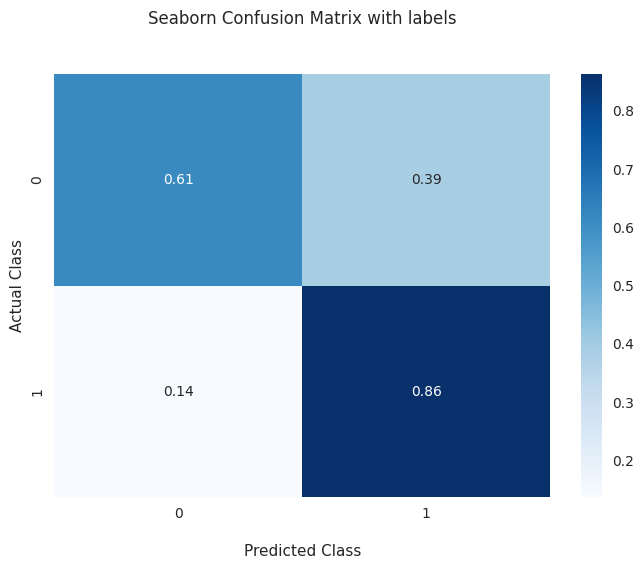

              precision    recall  f1-score   support

           0       0.99      0.61      0.76      1454
           1       0.12      0.86      0.21        88

    accuracy                           0.63      1542
   macro avg       0.55      0.74      0.48      1542
weighted avg       0.94      0.63      0.72      1542

AUC Score
0.7382143303738902


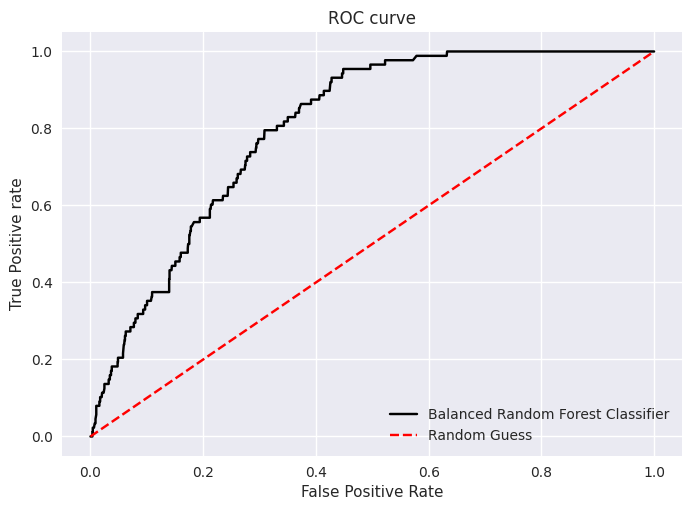

In [67]:
BRF_model = BalancedRandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, random_state=0)
BRF_model.fit(X_train, y_train)
evaluate(BRF_model,"Balanced Random Forest Classifier", X_val, y_val)

Permutation explainer: 1543it [09:22,  2.69it/s]


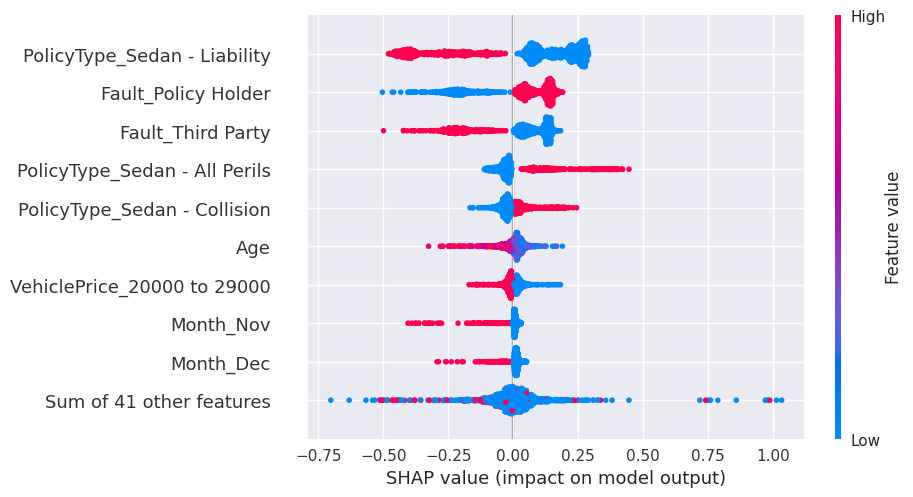

In [34]:
BRFexplainer = shap.Explainer(BRF_model.predict, X_val, feature_names=impt_feature_names.values)
BRFshap_values = BRFexplainer(X_val)
shap.plots.beeswarm(BRFshap_values)

Based on the top few features, we can observe that:
- A higher value of `PolicyType_Sedan - Liability` will lead to lower chance of fraud while a lower value of `PolicyType_Sedan - Liability` will lead to higher chance of fraud.
- A higher value of `Fault_Policy Holder` will lead to higher chance of fraud while a lower value of `Fault_Policy Holder` will lead to lower chance of fraud.
- A higher value of `Fault_Third Party` will lead to lower chance of fraud while a lower value of `Fault_Third Party` will lead to higher chance of fraud.
- A higher value of `PolicyType_Sedan - All Perils` will lead to higher chance of fraud.
- A higher value of `PolicyType_Sedan - Collision` will lead to higher chance of fraud.
- A higher value of `Age` will lead to lower chance of fraud while a lower value of `Age` will lead to higher chance of fraud.
- A higher value of `VehiclePrice_20000 to 29000` will lead to lower chance of fraud while a lower value of `VehiclePrice_20000 to 29000` will lead to higher chance of fraud.
- A higher value of `Month_Nov` will lead to lower chance of fraud.
- A higher value of `Month_Dec` will lead to lower chance of fraud.

### Model 5 - Neural networks (NN)

In [35]:
# #3 layers - 8,16,8

# # create sequential multi-layer perceptron
# NNmodel1 = Sequential()

# # layer 1
# NNmodel1.add(Dense(8, activation='relu', input_dim=50))

# # layer 2
# NNmodel1.add(Dense(16, activation='relu'))

# # layer 3
# NNmodel1.add(Dense(8, activation='relu'))

# #output layer
# NNmodel1.add(Dense(1, activation='sigmoid'))

# # configure the model
# opt = tensorflow.keras.optimizers.Adam(learning_rate=0.000045)
# NNmodel1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

# # fit the model
#NNmodel1_history = NNmodel1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, class_weight=sklearn_weights)

# #fit the model on test set
# predict_test=NNmodel1.predict(X_val).round()
# print(confusion_matrix(y_val,predict_test))
# print(classification_report(y_val,predict_test))

In [36]:
# recall metric defined to be used for NN
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

In [37]:
# Calculate weights using sklearn
sklearn_weights = class_weight.compute_class_weight(class_weight ='balanced', classes= np.unique(y_train), y=y_train)
sklearn_weights
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.5323694432455762, 1: 8.223333333333333}

In [52]:
#3 layers - 8,16,8

# create sequential multi-layer perceptron
NNmodel = Sequential()

# layer 1
NNmodel.add(Dense(8, activation='relu', input_dim=50))

# layer 2
NNmodel.add(Dense(16, activation='relu'))

# layer 3
NNmodel.add(Dense(8, activation='relu'))

#output layer
NNmodel.add(Dense(1, activation='sigmoid'))

# configure the model
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.000045)

NNmodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc',recall])

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='recall', mode='max', patience=3)

In [53]:
# fit the model 

NNmodel_history = NNmodel.fit(X_train, y_train, epochs=50, class_weight=sklearn_weights, callbacks=[callback])

Epoch 1/50
386/386 [==============================] - 3s 5ms/step - loss: 0.7103 - acc: 0.7117 - recall: 0.2674
Epoch 2/50
386/386 [==============================] - 2s 5ms/step - loss: 0.7026 - acc: 0.6794 - recall: 0.3051
Epoch 3/50
386/386 [==============================] - 2s 5ms/step - loss: 0.6960 - acc: 0.6536 - recall: 0.3353
Epoch 4/50
386/386 [==============================] - 2s 4ms/step - loss: 0.6898 - acc: 0.6233 - recall: 0.3744
Epoch 5/50
386/386 [==============================] - 2s 5ms/step - loss: 0.6838 - acc: 0.6091 - recall: 0.3979
Epoch 6/50
386/386 [==============================] - 2s 4ms/step - loss: 0.6779 - acc: 0.6006 - recall: 0.4119
Epoch 7/50
386/386 [==============================] - 2s 5ms/step - loss: 0.6720 - acc: 0.5960 - recall: 0.4192
Epoch 8/50
386/386 [==============================] - 2s 5ms/step - loss: 0.6658 - acc: 0.5964 - recall: 0.4226
Epoch 9/50
386/386 [==============================] - 2s 4ms/step - loss: 0.6591 - acc: 0.6033 - recall:

49/49 [==============================] - 0s 3ms/step
Neural Network
Model Performance


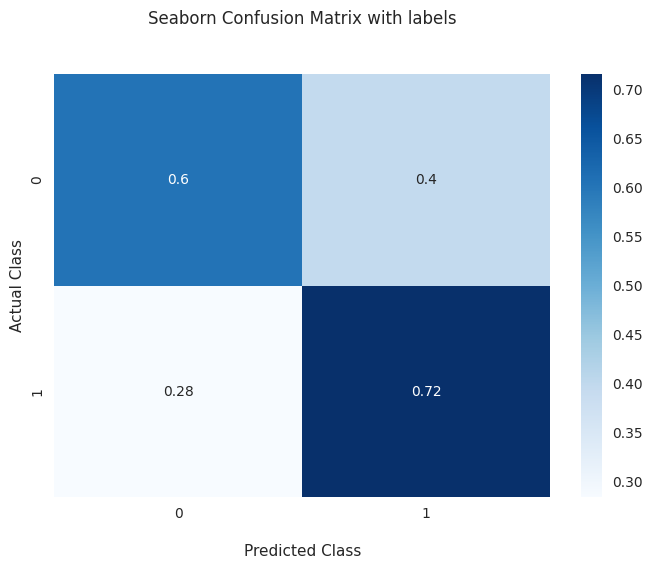

              precision    recall  f1-score   support

           0       0.97      0.60      0.75      1454
           1       0.10      0.72      0.17        88

    accuracy                           0.61      1542
   macro avg       0.54      0.66      0.46      1542
weighted avg       0.92      0.61      0.71      1542

AUC Score
0.6602241465549582


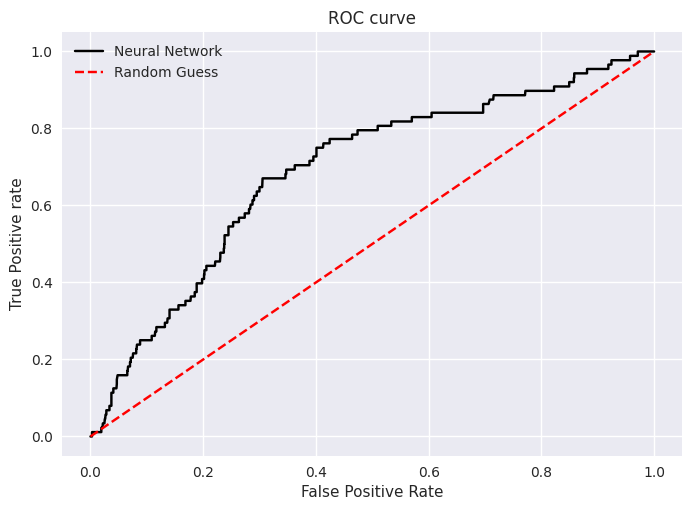

In [68]:
evaluate(NNmodel,"Neural Network", X_val, y_val)

Permutation explainer: 1543it [01:57, 12.16it/s]                          


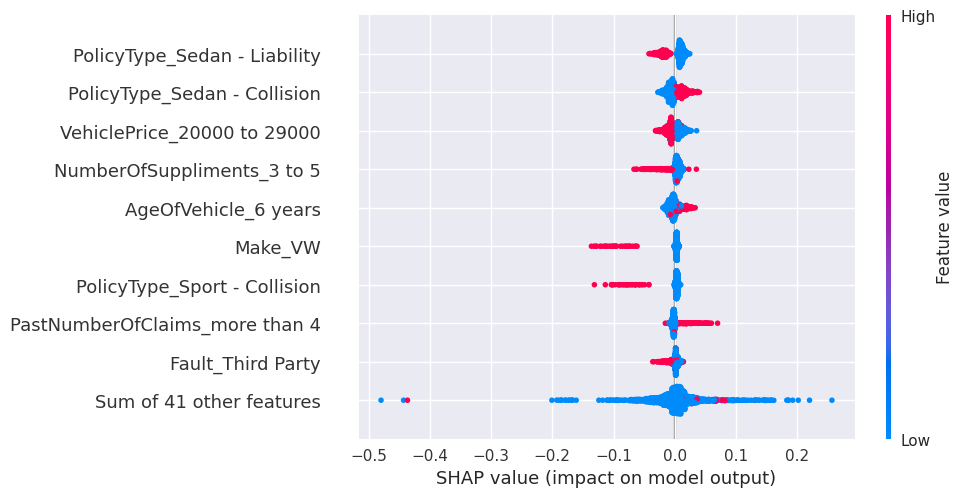

In [41]:
NNexplainer = shap.Explainer(NNmodel, X_val, feature_names=impt_feature_names.values)
NNshap_values = NNexplainer(X_val)
shap.plots.beeswarm(NNshap_values)

Based on the top few features, we can observe that:
- A higher value of `NumberOfSuppliments_3 to 5` will lead to lower chance of fraud.
- A higher value of `Make_VW` will lead to lower chance of fraud. 
- A higher value of `PolicyType_Sport - Collision` will lead to lower chance of fraud. 
- A higher value of `PastNumberOfClaims_more than 4` will lead to higher chance of fraud.

### Performance Evaluation of All Models 

In [70]:
# final evaluation
df_model = pd.DataFrame(index=all_models, columns=['Accuracy', 'Recall', 'AUC'])
df_model['Accuracy'] = accuracy.values()
df_model['Recall'] = recall_result.values()
df_model['AUC'] = roc_auc.values()

df_model

,Accuracy,Recall,AUC
Logistic Regression,0.597276,0.943182,0.759761
Support Vector Machine (SVM),0.599222,0.897727,0.739441
XGBoost,0.595331,0.943182,0.758730
Random Forest,0.627108,0.863636,0.738214
Neural Network (NN),0.610895,0.715909,0.660224


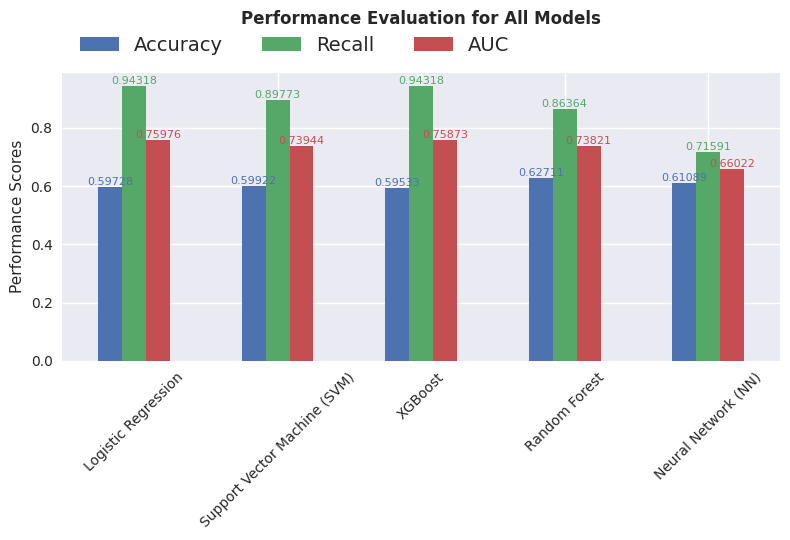

In [168]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(all_models), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
ax.set_ylabel('Performance Scores') # Add text label for y-axis

# Add text for title 
ax.set_title('Performance Evaluation for All Models', fontsize=12, fontweight="bold", pad=35) 


# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()

  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f"{bar_value:,.5f}"

  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2

  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value

  # To get the text colour to be the same color as the bar 
  # (If want a consistent color, can just set it as a constant, e.g. #222222)
  bar_color = bar.get_facecolor()

  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=8)


plt.tight_layout()
plt.show()

## Making New Predictions with the Chosen Model

XGB
Model Performance


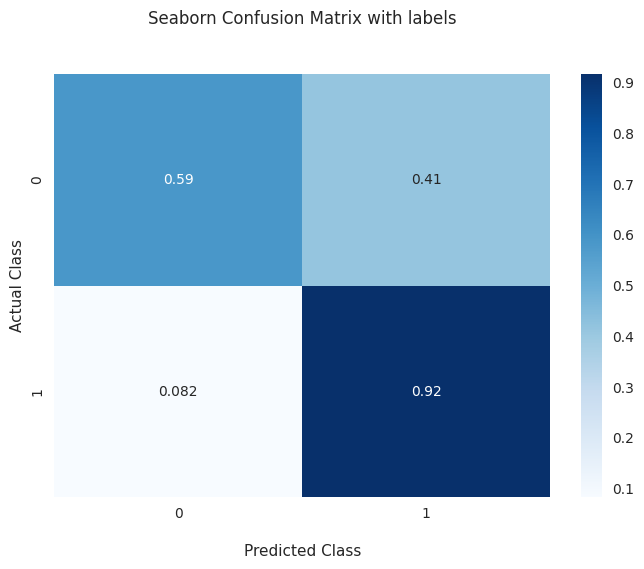

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1457
           1       0.11      0.92      0.20        85

    accuracy                           0.60      1542
   macro avg       0.55      0.75      0.47      1542
weighted avg       0.94      0.60      0.71      1542

AUC Score
0.751891477249788


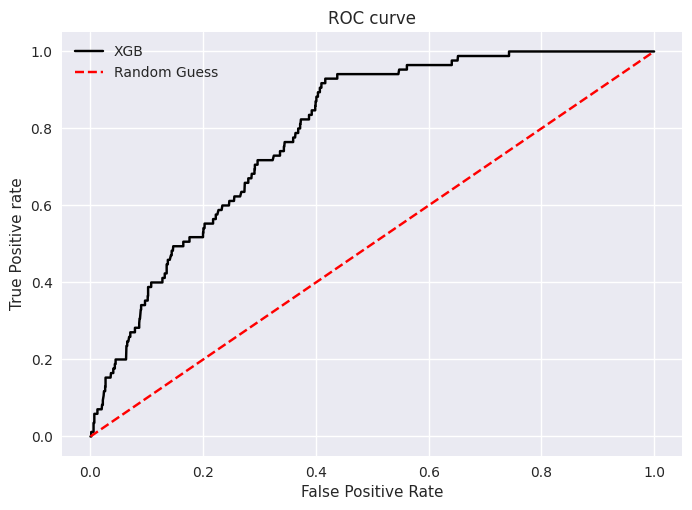

In [72]:
## Making new pred with the chosen/best model on the Test Set (to uncomment the below code)
evaluate(logisReg_model, "XGB", X_test, y_test)

## ML Explainability on Test Result's Confusion Matrix

We decided to use SHAP to explain single samples from each confusion matrix quadrant (TP, TN, FP, FN) to explain how the model classifies and misclassifies certain observations.

### Combined/Overall

Permutation explainer: 1543it [03:01,  8.14it/s]


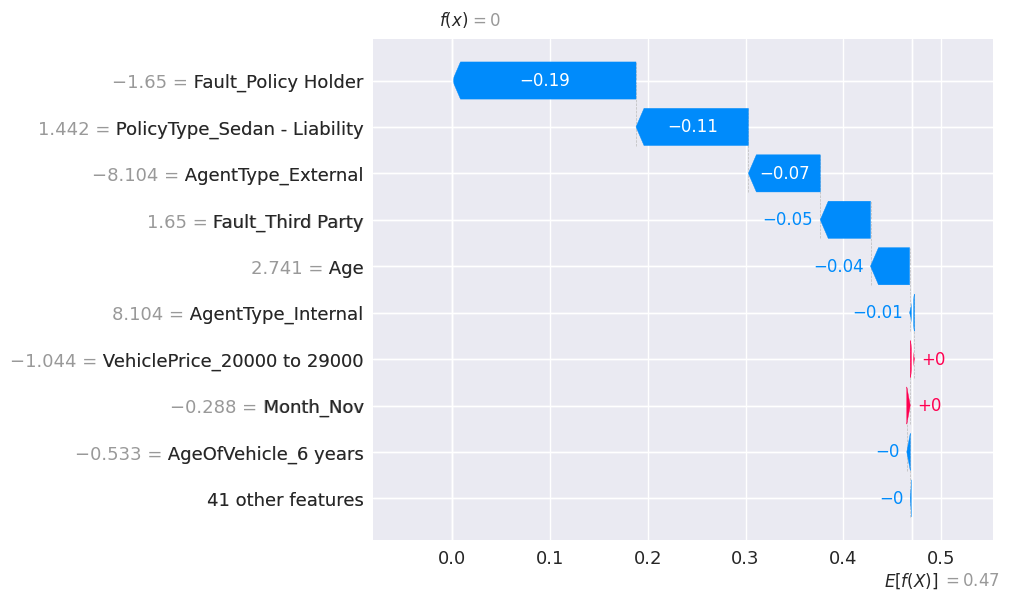

Permutation explainer: 1543it [03:12,  7.38it/s]


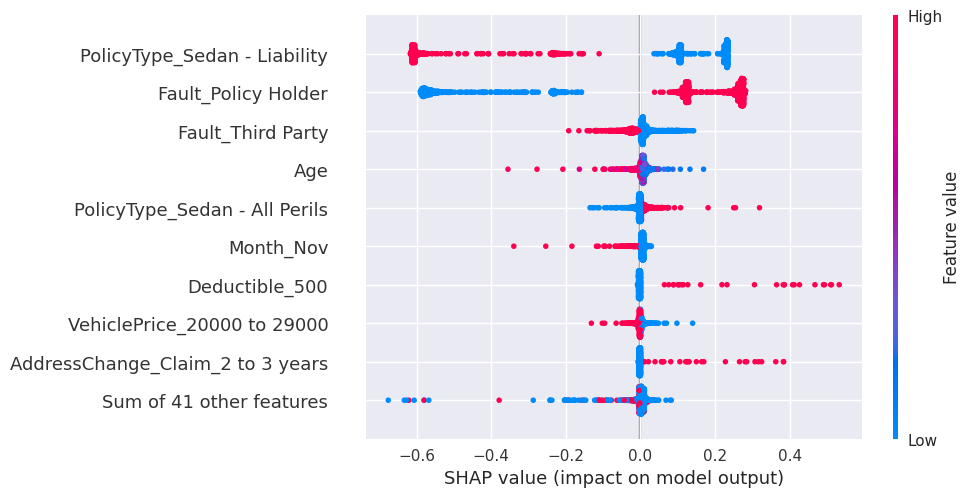

In [167]:
finalModelExplainer = shap.Explainer(logisReg_model.predict, X_test, feature_names=impt_feature_names.values)
finalModelshap_values = finalModelExplainer(X_test)
shap.plots.beeswarm(finalModelshap_values)

**Conditions for the model to predict higher tendency of fraud:**

- `PolicyType_Sedan` - Liability: Low value
- `Fault_Policy Holder`: High value
- `Fault_Third Party`: Low value
- `Age`: Low value
- `PolicyType_Sedan - All Perils`: High value
- `Month_Nov`: Low value
- `Deductible_500`: High value
- `VehiclePrice_20000 to 29000`: Low value
- `AddressChange_Claim_2 to 3 years`: High value


### True Negative (TN)

In [140]:
testResults = pd.DataFrame()
testResults["groundTruth"] = y_test
testResults["Predicted"] = logisReg_model.predict(X_test)
testResults = testResults.reset_index(drop=True)

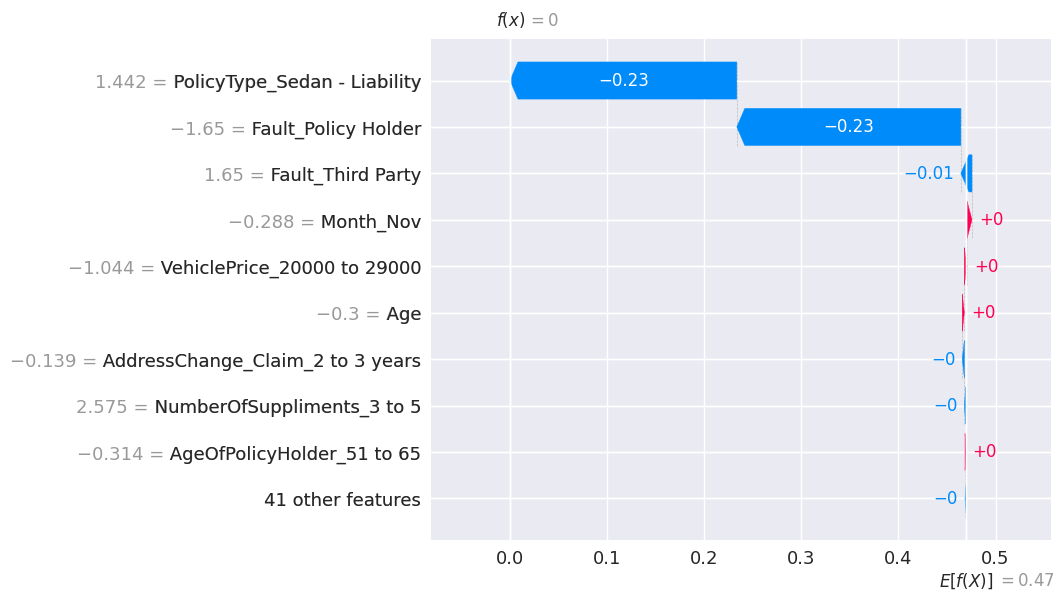

In [143]:
# testResults[(testResults["Predicted"] == 0) & (testResults["groundTruth"] == 0)] ##index 1536 - TN

shap.plots.waterfall(finalModelshap_values[1536])


For TN: The model predicts non-fraud correctly due to the top 3 features listed below that contributes to the sample predicted as non-fraud. 

- `PolicyType_Sedan - Liability`: High value

- `Fault_Policy Holder`: Low value

- `Fault_ Third Party`: High value

According to the conditions of the predictive model, the values of these features represents lower chance of fraud. 






### True Positive (TP)

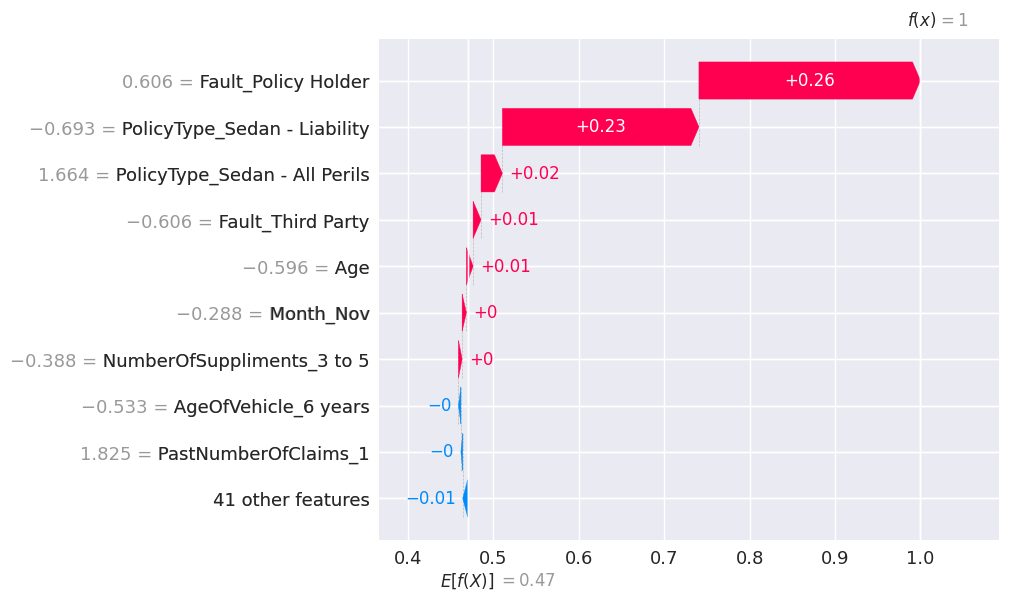

In [145]:
# testResults[(testResults["Predicted"] == 1) & (testResults["groundTruth"] == 1)] ##index 1404 - TP

shap.plots.waterfall(finalModelshap_values[1404])

For TP: The model predicts fraud correctly due to the top 3 features listed below that contributes to the sample predicted as non-fraud. 

- `Fault_Policy Holder`: High value

- `PolicyType_Sedan - Liability`: Low value

- `PolicyType_Sedan - Perils`: High value

According to the conditions of the predictive model, the values of these features represents higher chance of fraud. 


### False Positive (FP)

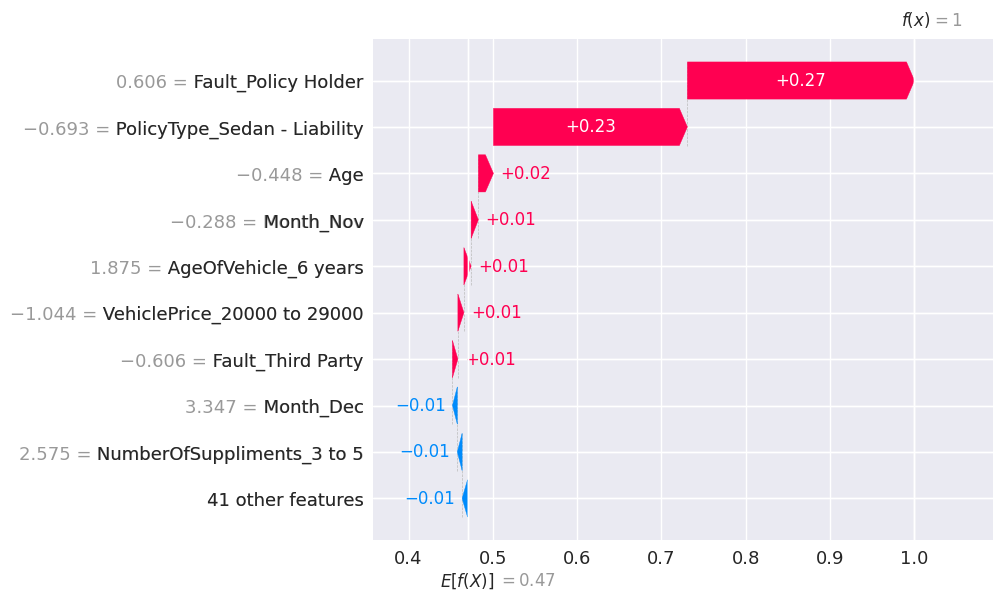

In [148]:
# testResults[(testResults["Predicted"] == 1) & (testResults["groundTruth"] == 0)] ##index 2 - FP

shap.plots.waterfall(finalModelshap_values[2])

For FP: The model predicts non-fraud as fraud largely due to the top 3 features listed below that contributes to the sample predicted as non-fraud. 

- `Fault_Policy Holder`: High value

- `PolicyType_Sedan - Liability`: Low value

- `Age`: Low value

According to the conditions of the predictive model, the values of these features represents higher chance of fraud. Thus, it was classified as fraud instead of non-fraud.

### False Negative (FN)

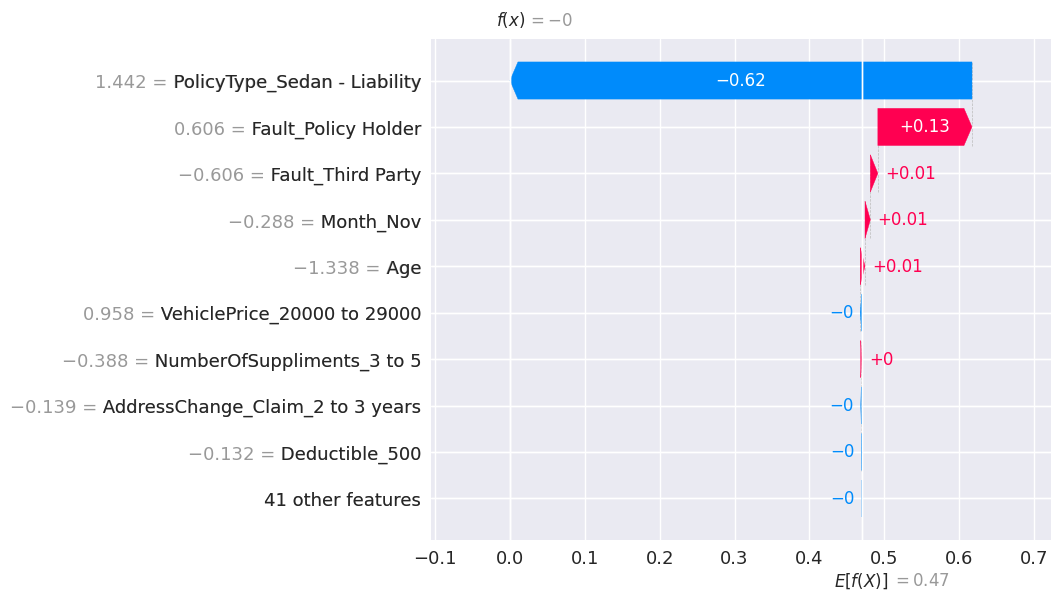

In [150]:
# testResults[(testResults["Predicted"] == 0) & (testResults["groundTruth"] == 1)] ##index 16 - FN

shap.plots.waterfall(finalModelshap_values[16])

For FN: The model predicts fraud as non-fraud largely due to the top 3 features listed below that contributes to the sample predicted as non-fraud. 

- `PolicyType_Sedan - Liability`: High value

- `Fault_Policy Holder`: High value

- `Fault_Third Party`: Low value

According to the conditions of the predictive model, the values of these features represents lower chance of fraud. Especially when the `PolicyType_Sedan - Liability`, is the most important feature in prediction of fraud. Thus, it was classified as non-fraud instead of fraud.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39c449af-1ed1-41b1-8c6c-19d403131f75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>